In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Import the dataset containing movie attributes.

In [97]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/u.data', sep='\t')

df.columns = columns
df.head()

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


Import the titles of the names and combine two dataframes.

In [98]:
title_df = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/Movie_Id_Titles')
title_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [99]:
df = pd.merge(df, title_df, how='left', on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,0,133,1,881250949,Gone with the Wind (1939)
2,196,242,3,881250949,Kolya (1996)
3,186,302,3,891717742,L.A. Confidential (1997)
4,22,377,1,878887116,Heavyweights (1994)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100002 entries, 0 to 100001
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100002 non-null  int64 
 1   item_id    100002 non-null  int64 
 2   rating     100002 non-null  int64 
 3   timestamp  100002 non-null  int64 
 4   title      100002 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [101]:
df.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

Note that the ratings can take only 5 different values.

In [102]:
df.rating.unique()

array([5, 1, 3, 2, 4], dtype=int64)

How many films does the dataset have?

In [103]:
df.title.nunique()

1664

Find the films whose average rating is 5.

In [104]:
films_sorted = df.groupby('title').rating.mean().sort_values(ascending=False)
films_sorted[films_sorted.values >= 4.8]

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

Find the top 10 films that got most number of ratings.

In [105]:
# df.groupby('title').agg({'user_id': pd.Series.count}).sort_values(by='user_id', ascending=False).head(10)
# or, alternatively
df.groupby('title').size().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

Find the customer ids that rated most number of films.

In [106]:
df.groupby('user_id').size().sort_values(ascending=False).head(10)

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64

Now, create a new dataframe that shows how many people rated a film and its average rating score.

In [107]:
rating_df = pd.DataFrame(df.groupby('title').size(), columns=['number of rating'])
rating_df['average rating'] = df.groupby('title').rating.mean()
rating_df.sample(5)

,number of rating,average rating
title,,
Antonia's Line (1995),69,3.956522
White Man's Burden (1995),10,2.000000
Dante's Peak (1997),240,2.933333
"Big Squeeze, The (1996)",4,2.250000
Somewhere in Time (1980),82,3.426829


How the number of ratings are distributed.

<AxesSubplot:>

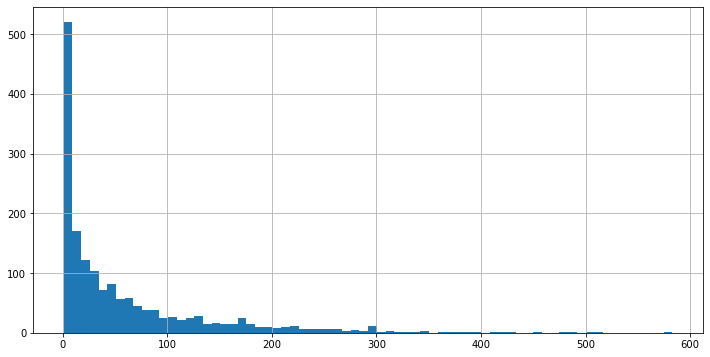

In [108]:
rating_df['number of rating'].hist(bins=70, figsize=(12,6))

<AxesSubplot:>

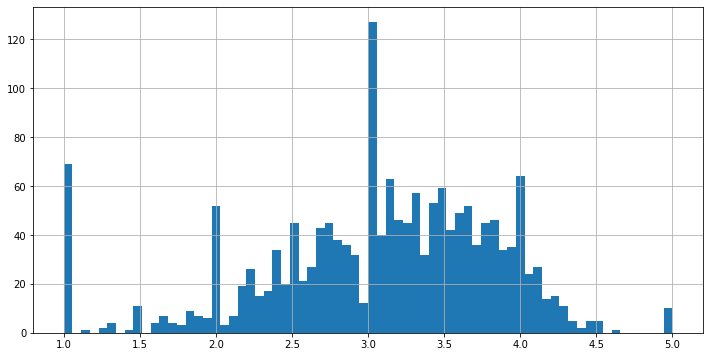

In [109]:
rating_df['average rating'].hist(bins=70, figsize=(12,6))

We see that most films are rated by less than 50 users. Considering that there are more than 1,500 films, the films with high rating score are likely to be rated by a few people.

Now, plot the number of rating vs average rating to see if the rating scores indeed depends the number of ratings.

<AxesSubplot:xlabel='average rating', ylabel='number of rating'>

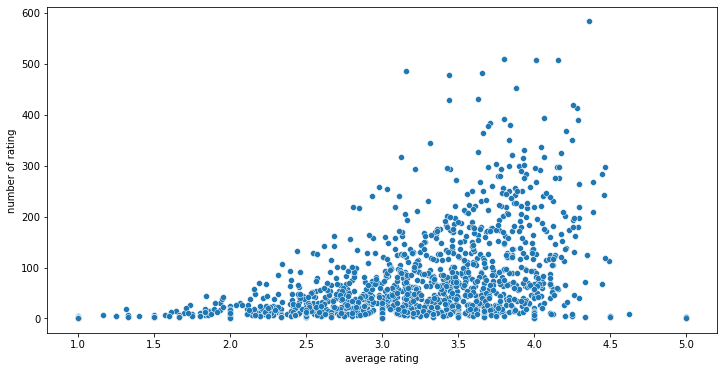

In [110]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=rating_df, y='number of rating', x='average rating')

In [111]:
df

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,0,133,1,881250949,Gone with the Wind (1939)
2,196,242,3,881250949,Kolya (1996)
3,186,302,3,891717742,L.A. Confidential (1997)
4,22,377,1,878887116,Heavyweights (1994)
...,...,...,...,...,...
99997,880,476,3,880175444,"First Wives Club, The (1996)"
99998,716,204,5,879795543,Back to the Future (1985)
99999,276,1090,1,874795795,Sliver (1993)
100000,13,225,2,882399156,101 Dalmatians (1996)


In [112]:
pivot_df = df.pivot_table(index='user_id', columns='title', values='rating')
pivot_df

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have a lot of nan values, which makes sense as most films are not rated by many people. Now, create a series that shows how the ratings of the users for Star Wars (1977), which was one of the most rated films.

In [113]:
star_wars = pivot_df['Star Wars (1977)']
star_wars

user_id
0      NaN
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

Can we get an idea about how much the users who rated Star Wars (1977), rated the other movies? In other words, how much likely can a person who liked Star Wars like other movies or vice versa?

In [114]:
starwars_corr = pd.DataFrame(pivot_df.corrwith(star_wars), columns=['correlation'])
starwars_corr.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


We found how Star Wars is correlated with other films. However, as we found earlier, most films aren't rated by many people, and let's drop the films that are rated by less than 50 people so that we have a more reliable dataset regarding correlation.

In [115]:
starwars_100 = rating_df[rating_df['number of rating'] >= 50].join(starwars_corr)
starwars_100

,number of rating,average rating,correlation
title,,,
101 Dalmatians (1996),109,2.908257,0.211132
12 Angry Men (1957),125,4.344000,0.184289
2 Days in the Valley (1996),93,3.225806,0.066654
"20,000 Leagues Under the Sea (1954)",72,3.500000,0.289768
2001: A Space Odyssey (1968),259,3.969112,0.230884
...,...,...,...
Wolf (1994),67,2.701493,0.113214
"Wrong Trousers, The (1993)",118,4.466102,0.216204
Wyatt Earp (1994),50,3.100000,0.059560


Finally, recommend 10 films to the users who liked the Star Wars.

In [116]:
starwars_100.sort_values(by='correlation', ascending=False).iloc[1:11]

,number of rating,average rating,correlation
title,,,
"Empire Strikes Back, The (1980)",368,4.206522,0.747981
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Giant (1956),51,3.745098,0.488093
"Life Less Ordinary, A (1997)",53,3.075472,0.411638
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
